# lab 2 Amelin Viacheslav IP-05
Develop an intelligent agent-machine that moves along the graph-path from the previous laboratory work according to the given rules and goal. Gain practical skills in working with intelligent agents.

In [775]:
import networkx as nx
import matplotlib.pyplot as plt
import random

#### Size road

In [776]:
size = 5
delete = 9

#### Check Error

In [777]:
if(size < 2):
    raise ValueError("size must be greater than 1")
maxDelete = (2**(size-1)) + 2
if(maxDelete < delete):
    raise ValueError(f"removal should be no more than, {maxDelete}")

## Algorithm
  

#### Creating and modifying a graph

In [778]:
G = nx.grid_2d_graph(size, size)

count = 0
nodeList = list(G.nodes())

while count < delete:
    randomEdgeCol = random.randint(-1, 1)
    randomEdgeRow = random.randint(-1, 1)
    
    randomNode = random.choice(nodeList)
    nodeCol, nodeRow = randomNode[0] + randomEdgeCol, randomNode[1] + randomEdgeRow
    
    if(G.has_edge(randomNode, (nodeCol, nodeRow))): 
        G.remove_edge(randomNode, (nodeCol, nodeRow))
        if not nx.is_connected(G):
            G.add_edge(randomNode, (nodeCol, nodeRow))
        else: count += 1

#### Load graph

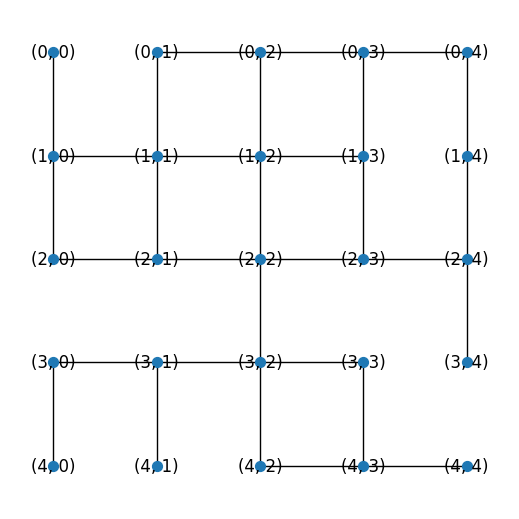

In [779]:
plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos, with_labels=(pos, pos), node_size=50)

#### Enter start and end coordinates

In [780]:
start_cord = (0, 0)
end_cord = (4, 4)

#### Check Error

In [781]:
if((size, size) <= end_cord and (size, size) <= start_cord):
  raise ValueError(f"Should be less {size}")

if(end_cord > (0, 0) and start_cord > (0, 0)):
  raise ValueError("Must be greater than zero")

### Agent

In [782]:
def agent(G, start_cord, end_cord):
  visited = (start_cord, )
  path = [start_cord]
 
  while path[-1] != end_cord:
    next_nodes = G.adj[path[-1]]
    best = None

    for node in list(next_nodes): 
      if node == end_cord:
        path.append(node)
        print(*path, sep = ' => ')
        return path, visited
      elif node not in visited:
        if best is None or abs(node[0] - end_cord[0]) + abs(node[1] - end_cord[1]):
          best = node

    if best is None:
      path.pop()
    else:
      path.append(best)
      visited += (best,)

    print(*path, sep = ' => ')

path, visited = agent(G, start_cord, end_cord)

(0, 0) => (1, 0)
(0, 0) => (1, 0) => (1, 1)
(0, 0) => (1, 0) => (1, 1) => (1, 2)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4) => (3, 4)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4) => (1, 4)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4) => (1, 4) => (0, 4)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4) => (1, 4) => (0, 4) => (0, 3)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4) => (1, 4) => (0, 4) => (0, 3) => (0, 2)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4) => (1, 4) => (0, 4) => (0, 3) => (0, 2) => (0, 1)
(0, 0) => (1, 0) => (1, 1) => (1, 2) => (1, 3) => (2, 3) => (2, 4) => (1, 4) => (0, 4) => (0, 3) => (0, 2)
(0, 0) => (1

#### Load graph

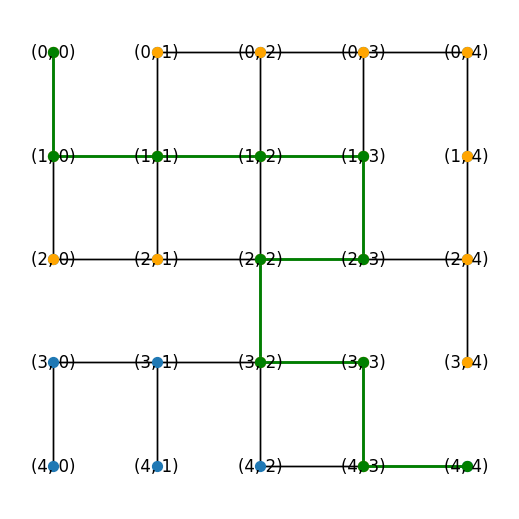

In [783]:
plt.figure(figsize=(5,5))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos, with_labels=(pos, pos), node_size=50)
nx.draw(G, pos, nodelist=visited, node_color='orange', node_size=50,)
nx.draw(G, pos, nodelist=path, node_color='g', node_size=50,  edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], edge_color='g', width=2)

plt.show()